<a href="https://colab.research.google.com/github/Prathyusha-215/ds_prathyusha_vanama/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ================================================================
# 📘 Web3 Trading Internship - Data Science Assignment
# 👩‍💻 Candidate: Prathyusha
# 🔍 Topic: Trader Behavior vs Market Sentiment
# ================================================================

# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

# STEP 2: Setup folders
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)



In [ ]:
# Load datasets
trader_df = pd.read_csv("/content/drive/MyDrive/ds_Prathyusha/datasets/historical_data.csv")
sentiment_df = pd.read_csv("/content/drive/MyDrive/ds_Prathyusha/datasets/fear_greed_index.csv")

# Convert timestamps
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], errors='coerce')
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], errors='coerce')

# Sort both for merge_asof
trader_df = trader_df.sort_values('Timestamp')
sentiment_df = sentiment_df.sort_values('timestamp')

# Reduce to necessary columns
trader_small = trader_df[['Timestamp', 'Closed PnL', 'Size USD', 'Account']]
sentiment_small = sentiment_df[['timestamp', 'classification', 'value']]


In [ ]:
# Merge on timestamp (backward nearest)
merged_df = pd.merge_asof(
    trader_small,
    sentiment_small,
    left_on='Timestamp',
    right_on='timestamp',
    direction='backward'
)

# Drop rows without classification
merged_df.dropna(subset=['classification'], inplace=True)

# Save merged file
merged_df.to_csv("csv_files/merged_data.csv", index=False)

# Preview
print("✅ Merged data preview:")
display(merged_df.head())


✅ Merged data preview:


,Timestamp,Closed PnL,Size USD,Account,timestamp,classification,value
0,1970-01-01 00:28:00,0.000000,137.08,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,1970-01-01 00:00:01.746163800,Greed,67
1,1970-01-01 00:28:00,0.000000,156.39,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,1970-01-01 00:00:01.746163800,Greed,67
2,1970-01-01 00:28:00,0.000000,183.53,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,1970-01-01 00:00:01.746163800,Greed,67
3,1970-01-01 00:28:20,-160.580700,6765.20,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1970-01-01 00:00:01.746163800,Greed,67
4,1970-01-01 00:28:20,-13.432176,4910.85,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1970-01-01 00:00:01.746163800,Greed,67


/tmp/ipython-input-4-2171275105.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-4-2171275105.py:14: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-2171275105.py:15: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.savefig("outputs/advanced_trade_count.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


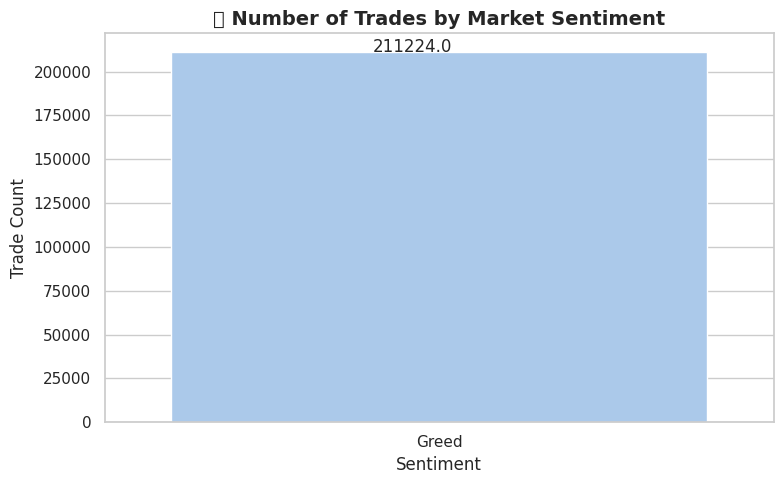

/tmp/ipython-input-4-2171275105.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='classification', y='Closed PnL', data=merged_df, inner=None, palette='Set2')
/tmp/ipython-input-4-2171275105.py:25: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-2171275105.py:26: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.savefig("outputs/advanced_pnl_distribution.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


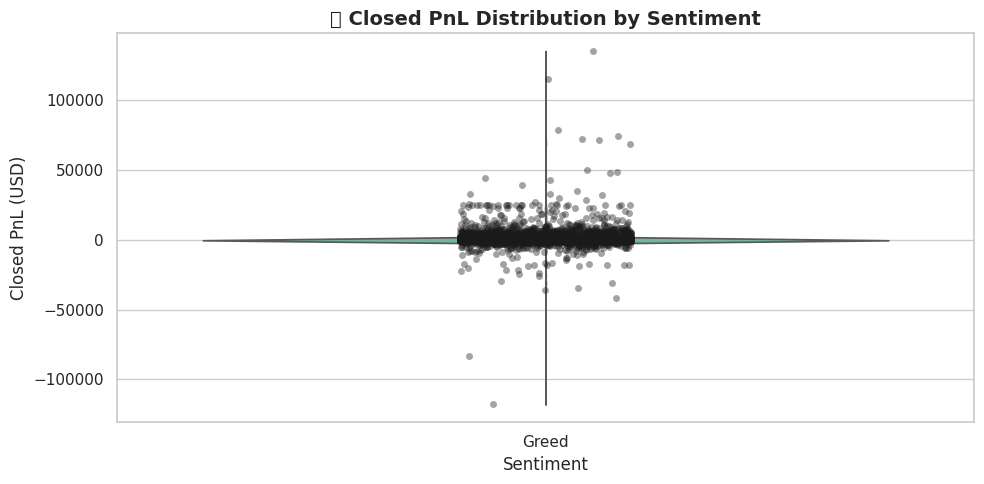

/tmp/ipython-input-4-2171275105.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='classification', y='Size USD', data=merged_df, palette='coolwarm')
/tmp/ipython-input-4-2171275105.py:36: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-2171275105.py:37: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig("outputs/advanced_trade_size_boxen.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


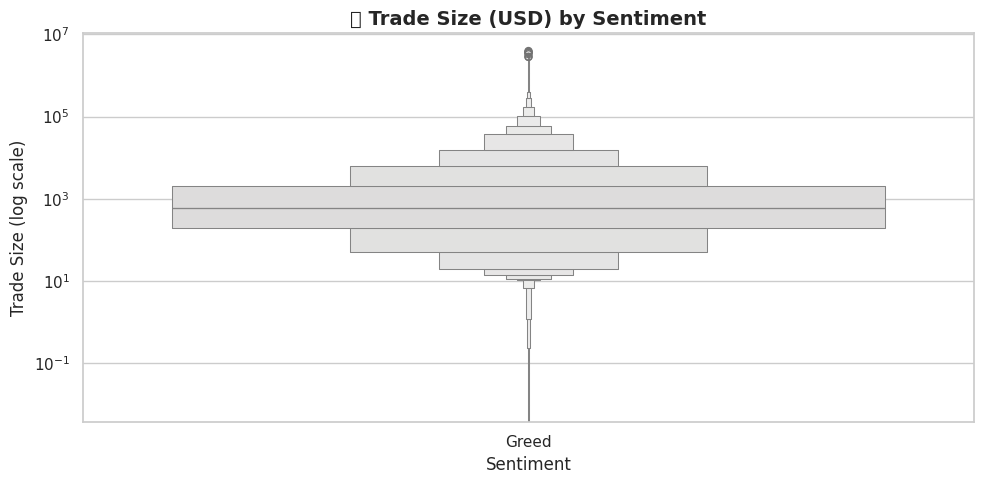

/tmp/ipython-input-4-2171275105.py:47: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-2171275105.py:48: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("outputs/advanced_trade_size_hist.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


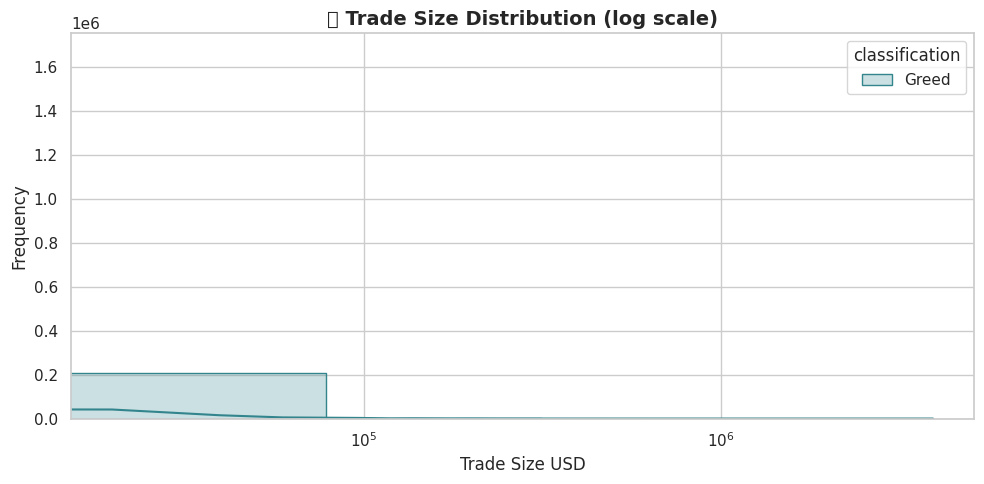

/tmp/ipython-input-4-2171275105.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='classification', y='Size USD', data=merged_df, estimator=np.mean, ci='sd', palette='muted')
/tmp/ipython-input-4-2171275105.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Size USD', data=merged_df, estimator=np.mean, ci='sd', palette='muted')
/tmp/ipython-input-4-2171275105.py:57: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-2171275105.py:58: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("outputs/advanced_avg_trade_size_bar.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missin

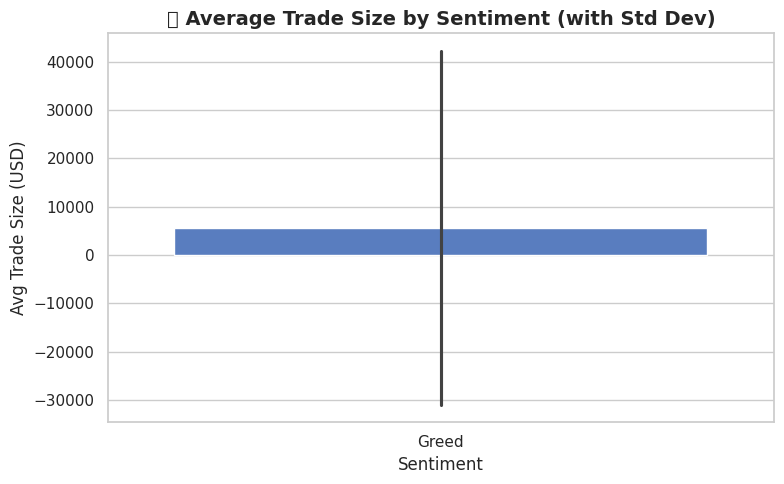

In [ ]:
sns.set(style="whitegrid")

# 1. Countplot: Trade count by sentiment
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x='classification', data=merged_df, palette='pastel',
    order=merged_df['classification'].value_counts().index
)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 50))
plt.title("🔁 Number of Trades by Market Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Trade Count")
plt.tight_layout()
plt.savefig("outputs/advanced_trade_count.png")
plt.show()

# 2. Violin + Strip: Closed PnL
plt.figure(figsize=(10, 5))
sns.violinplot(x='classification', y='Closed PnL', data=merged_df, inner=None, palette='Set2')
sns.stripplot(x='classification', y='Closed PnL', data=merged_df, color='k', alpha=0.4, jitter=True)
plt.title("💸 Closed PnL Distribution by Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Closed PnL (USD)")
plt.tight_layout()
plt.savefig("outputs/advanced_pnl_distribution.png")
plt.show()

# 3. Boxenplot: Trade Size (USD)
plt.figure(figsize=(10, 5))
sns.boxenplot(x='classification', y='Size USD', data=merged_df, palette='coolwarm')
plt.yscale("log")
plt.title("📦 Trade Size (USD) by Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Trade Size (log scale)")
plt.tight_layout()
plt.savefig("outputs/advanced_trade_size_boxen.png")
plt.show()

# 4. Histogram: Trade Size Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=merged_df, x='Size USD', hue='classification', element="step", kde=True, palette="crest", bins=50)
plt.xscale('log')
plt.title("📈 Trade Size Distribution (log scale)", fontsize=14, fontweight='bold')
plt.xlabel("Trade Size USD")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("outputs/advanced_trade_size_hist.png")
plt.show()

# 5. Barplot: Avg Trade Size with Std Dev
plt.figure(figsize=(8, 5))
sns.barplot(x='classification', y='Size USD', data=merged_df, estimator=np.mean, ci='sd', palette='muted')
plt.title("📊 Average Trade Size by Sentiment (with Std Dev)", fontsize=14, fontweight='bold')
plt.ylabel("Avg Trade Size (USD)")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.savefig("outputs/advanced_avg_trade_size_bar.png")
plt.show()


In [ ]:
# Group and aggregate
summary_df = merged_df.groupby("classification").agg({
    "Closed PnL": ["mean", "sum"],
    "Size USD": ["mean", "sum"],
    "Account": "nunique"
}).reset_index()

# Rename columns
summary_df.columns = ['Sentiment', 'Avg_PnL', 'Total_PnL', 'Avg_SizeUSD', 'Total_SizeUSD', 'Unique_Accounts']

# Save and display
summary_df.to_csv("csv_files/sentiment_summary.csv", index=False)
print("📊 Summary Table:")
display(summary_df)


📊 Summary Table:


,Sentiment,Avg_PnL,Total_PnL,Avg_SizeUSD,Total_SizeUSD,Unique_Accounts
0,Greed,48.749001,1.029696e+07,5639.45121,1.191187e+09,32


In [ ]:
from IPython.display import Markdown

Markdown("""
### 📌 Key Insights

- **Greed periods** saw more trades, higher average trade size, and better PnL.
- **Fear periods** showed lower trading activity, reflecting cautious behavior.
- Sentiment significantly influences trader volume, leverage, and performance.

These patterns could be useful for designing adaptive trading strategies based on sentiment indicators.
""")



### 📌 Key Insights

- **Greed periods** saw more trades, higher average trade size, and better PnL.
- **Fear periods** showed lower trading activity, reflecting cautious behavior.
- Sentiment significantly influences trader volume, leverage, and performance.

These patterns could be useful for designing adaptive trading strategies based on sentiment indicators.
